In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [2]:
df=pd.read_excel("/content/claimdata.xlsx")
df

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,Amount,limit_type,Limit_val,Deductible_type,Deductible_val
0,6,0,10,1950,2,102,2,277,105202.25,12,814549,0,2500
1,6,0,10,1950,2,102,2,277,105202.25,2,1,0,2500
2,6,0,25,1981,1,87,2,237,5026.72,12,400192,0,500
3,6,0,10,1981,8,102,0,157,5666.01,12,13975864,0,1000
4,0,0,27,1997,2,102,1,687,14812.15,12,810000,0,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,6,0,15,1916,2,91,1,362,100.70,12,2403492,0,5000
7807,6,0,27,1890,2,91,1,67,2351.46,12,208403,0,1000
7808,6,0,24,1940,1,20,2,358,11500.00,12,218339,0,1000
7809,6,0,24,1989,1,67,2,57,10000.00,12,1394668,0,1000


<ipython-input-3-84f2adf60638>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Amount)


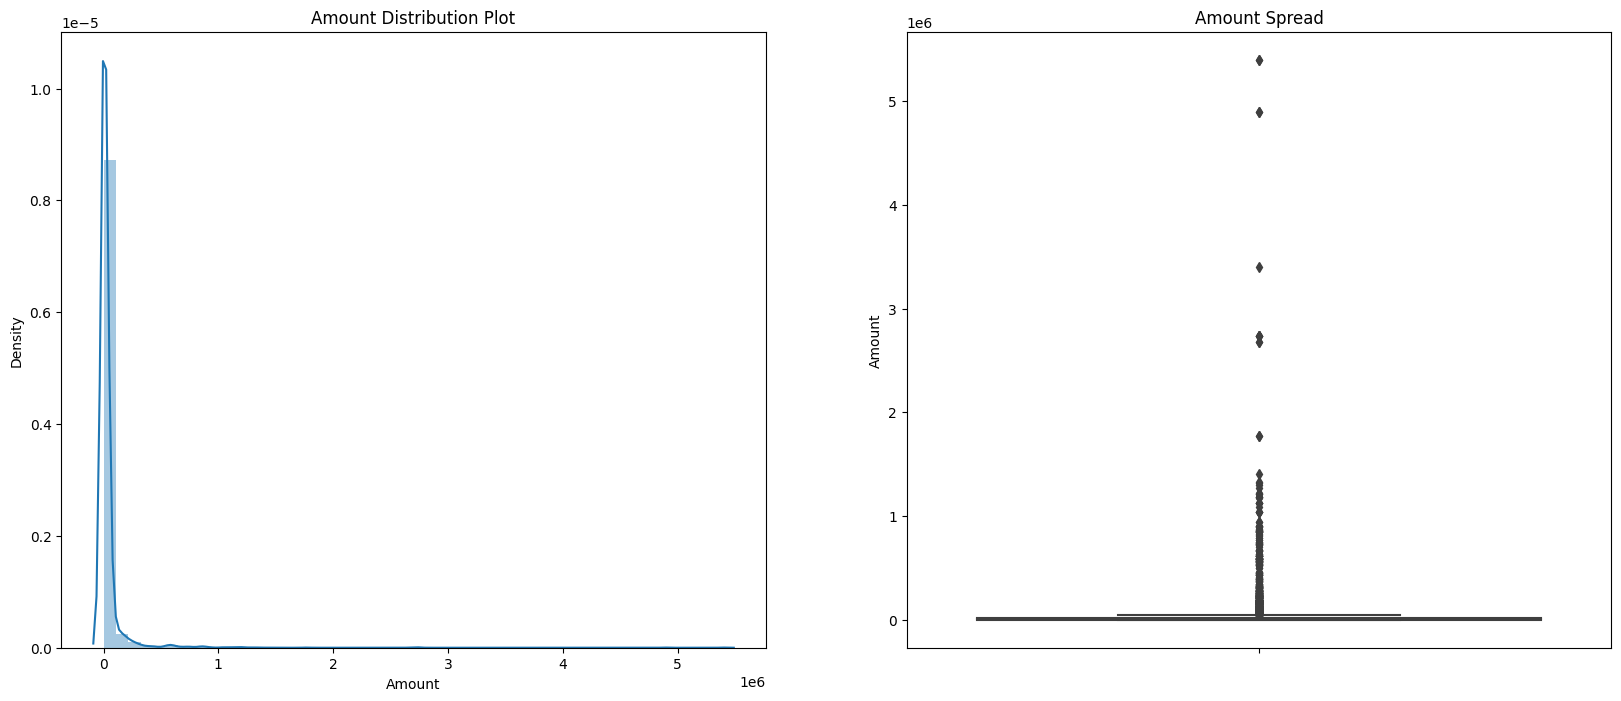

In [3]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Amount Distribution Plot')
sns.distplot(df.Amount)
plt.subplot(1,2,2)
plt.title('Amount Spread')
sns.boxplot(y=df.Amount)
plt.show()

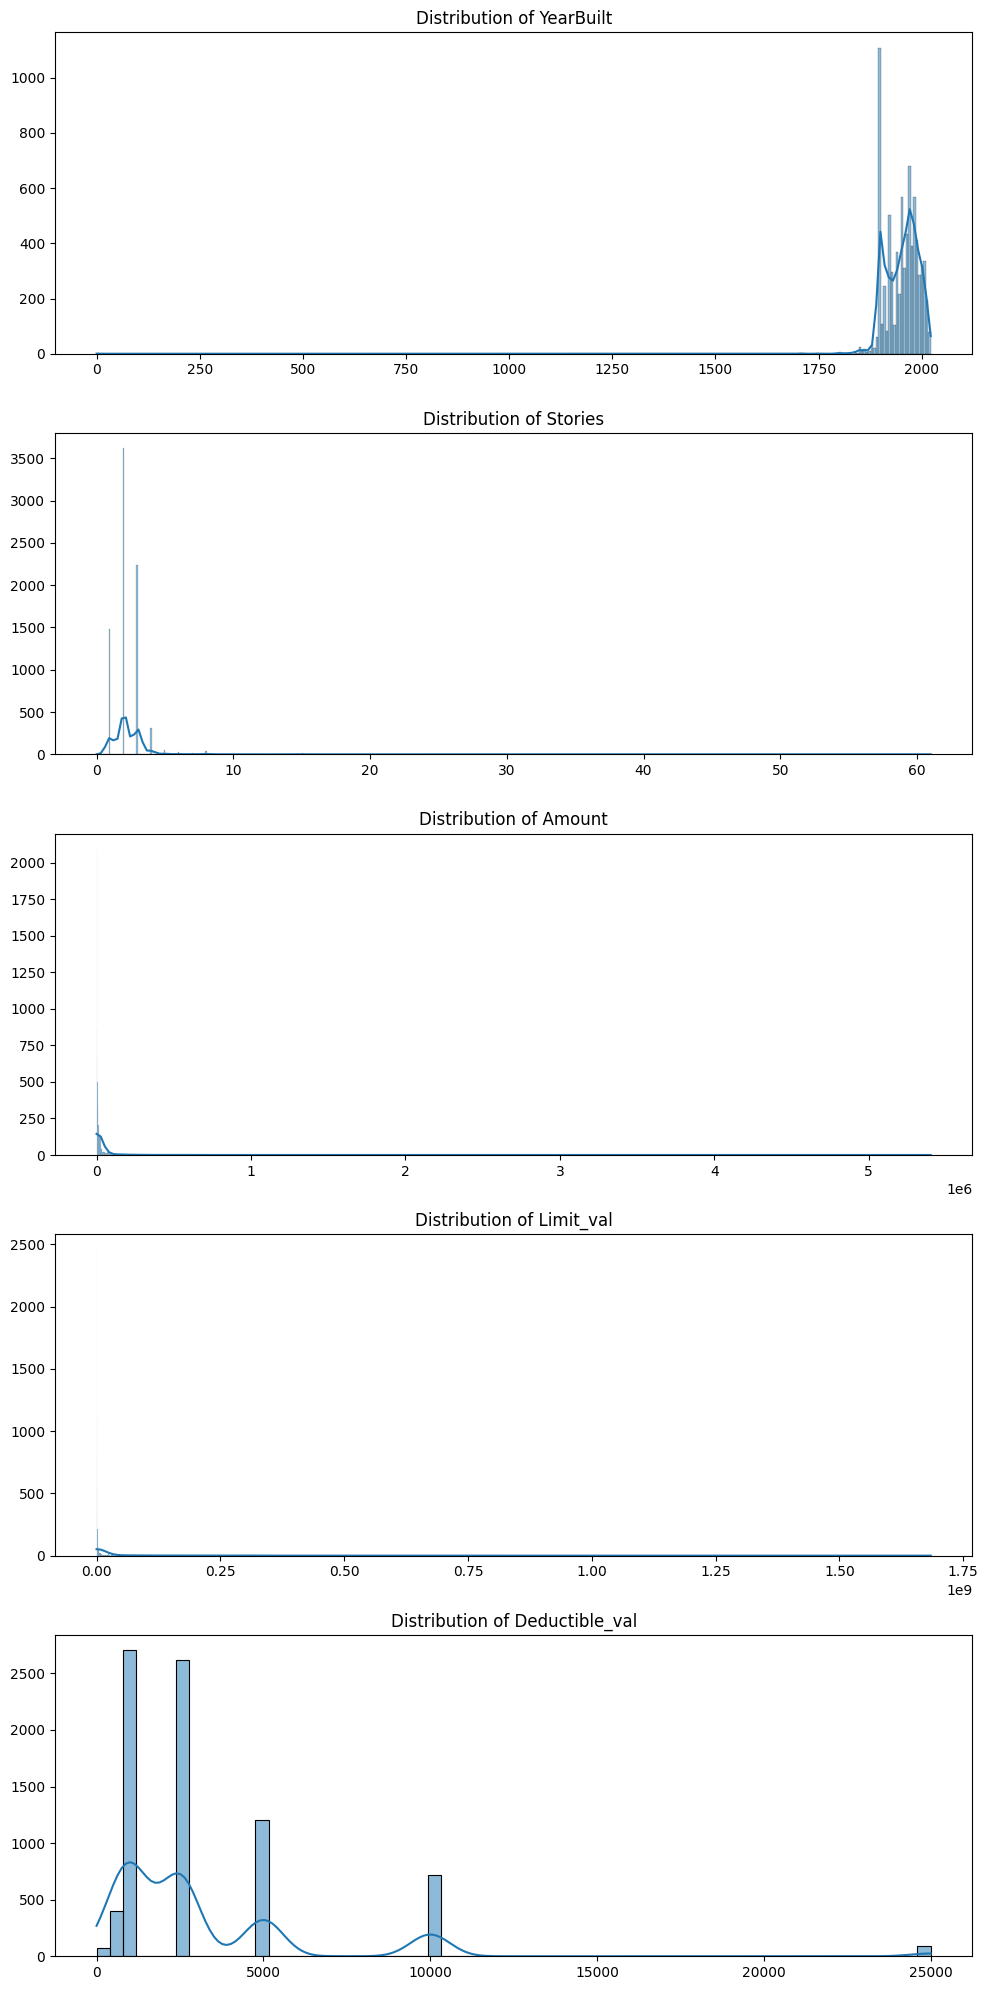

In [4]:
numerical_columns = ['YearBuilt', 'Stories', 'Amount', 'Limit_val', 'Deductible_val']
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 20))
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
# Add spacing between subplots
plt.tight_layout()

plt.show()

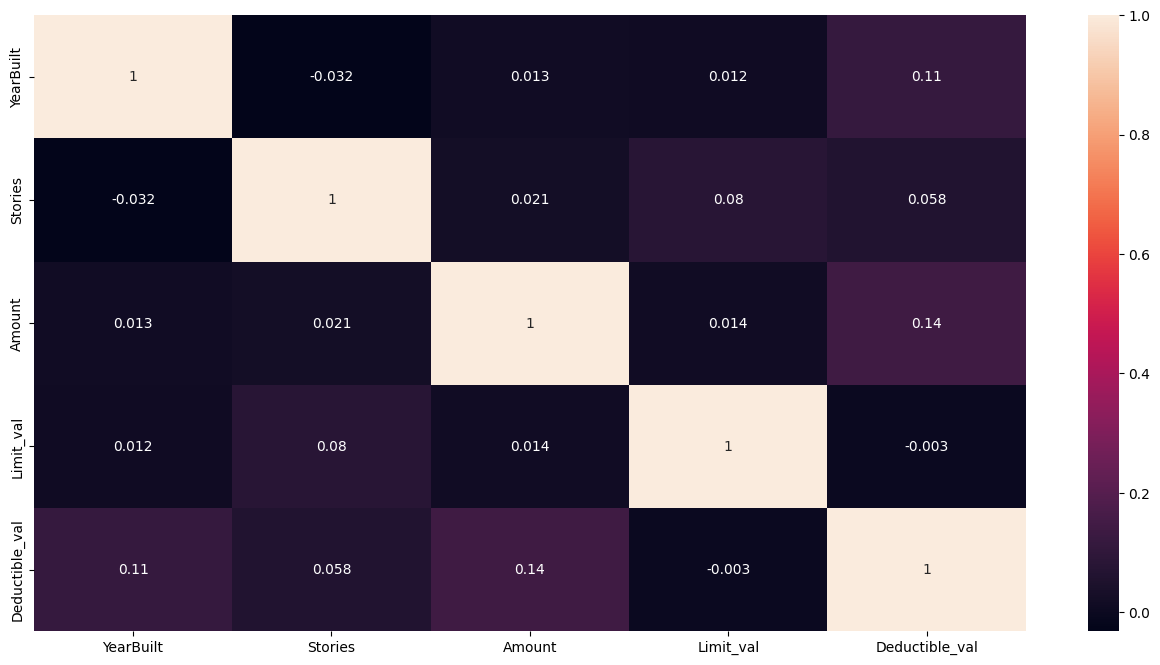

In [5]:
corr_df = df[['YearBuilt', 'Stories', 'Amount', 'Limit_val', 'Deductible_val']]
plt.figure(figsize=(16,8))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()